# COGS 108 - EDA Checkpoint

# Names

- Samuel
- Matthew
- Caitlin
- Darren
- Nick

<a id='research_question'></a>
# Research Question

Do large online communities ( of retail traders) have influence over the stock market?

*Sentiment analysis of positivity on the Reddit subreddit r/WallStreetBets and how this correlates to the performance of the S&P 500 from January 31, 2012 to the present.*

# Setup

In [2]:
## YOUR CODE HERE

# Include packages used for analysis in cell provided

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pmaw import PushshiftAPI
import os

# Data Cleaning

### Stock Market S&P 500 History

Our question is associated with how the positivity of the subreddit r/wallstreetbets correlates to the performance of the S&P 500 from January 31, 2012 to the present. This dataset before cleaning is already very clean. We just need to remove certain columns in order to get what we need to answer our research question. Therefore, we will just need the date and the closing price of the S&P 500. We do not need the adjusted close due to that we are working with the S&P 500 and don't need to work with out of hours like we would with an individual stock or the the opening price since it will just be the previous day's closing price. Since we are only considering the performance of the S&P 500, we do not need the volume.

To further clean our data, we converted the 'Date' column to a datetime object. This will help us graph a clean visualization of how the price fluctuates from January 12, 2012 to February 10, 2021.

In [3]:
# Open stocks dataset 
stocks = pd.read_csv("Stock_Market_S&P_500_History.csv")

# Take only the date and closing price columns
cleaned_stocks = stocks[['Date', 'Close']]
cleaned_stocks

,Date,Close
0,1/31/2012,1312.410034
1,2/1/2012,1324.089966
2,2/2/2012,1325.540039
3,2/3/2012,1344.900024
4,2/6/2012,1344.329956
...,...,...
2268,2/4/2021,3871.739990
2269,2/5/2021,3886.830078
2270,2/8/2021,3915.590088
2271,2/9/2021,3911.229980


In [4]:
# Change the date column into a datetime object
cleaned_stocks['Date'] = pd.to_datetime(cleaned_stocks['Date'])


<ipython-input-4-4578b155e55f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_stocks['Date'] = pd.to_datetime(cleaned_stocks['Date'])


In [5]:
# Look at the cleaned stocks dataset
cleaned_stocks

,Date,Close
0,2012-01-31,1312.410034
1,2012-02-01,1324.089966
2,2012-02-02,1325.540039
3,2012-02-03,1344.900024
4,2012-02-06,1344.329956
...,...,...
2268,2021-02-04,3871.739990
2269,2021-02-05,3886.830078
2270,2021-02-08,3915.590088
2271,2021-02-09,3911.229980


### r/wallstreetbets Subreddit Post History

Get each of your datasets into a usable (likely, tidy) format. Briefly explain what steps you had to take before you were able to use the datasets you chose to answer your question of interest.

- How 'clean' is the data?
- What did you have to do to get the data into a usable format? (If you did nothing, how did you determine there was nothing to do?)
- What pre-processing steps that were required for your methods (for example, checking data distributions and performing any transformations that may be required)

#### Code to webscrape Reddit API

This was used outside of our notebook in order to webscrape the Reddit API for the subreddit r/wallstreetbets from January 31, 2012 to February 12, 2021.

In [6]:
"""
import pandas as pd
from pmaw import PushshiftAPI
import os

outname = 'wallstreetbets_subs_full.csv'

outdir = './data'
if not os.path.exists(outdir):
    os.mkdir(outdir)

fullname = os.path.join(outdir, outname)

api = PushshiftAPI()
submissions = api.search_submissions(subreddit="wallstreetbets", after=1327968000, before=1613160000)

sub_df = pd.DataFrame(submissions)
sub_df.to_csv(fullname, header=True, index=False, columns=list(sub_df.axes[1]))
"""

'\nimport pandas as pd\nfrom pmaw import PushshiftAPI\nimport os\n\noutname = \'wallstreetbets_subs_full.csv\'\n\noutdir = \'./data\'\nif not os.path.exists(outdir):\n    os.mkdir(outdir)\n\nfullname = os.path.join(outdir, outname)\n\napi = PushshiftAPI()\nsubmissions = api.search_submissions(subreddit="wallstreetbets", after=1327968000, before=1613160000)\n\nsub_df = pd.DataFrame(submissions)\nsub_df.to_csv(fullname, header=True, index=False, columns=list(sub_df.axes[1]))\n'

#### Wallstreetbets Subs Full

We webscraped the subreddit r/wallstreetbets for a consistent time period. The Kaggle dataset we found stopped at August 2020. We wanted a time period that would span from when the subreddit was created (January 31, 2012) to the present. Our dataset, when first webscraped, has many unnecessary columns. Considering how our research question only asks about the positivity of the subreddit, columns such as 'subreddit', and 'event_is_live' are unneeded. We will be focusing on the following columns: selftext, author_fullname, title, url, total_awards_received, upvote_ratio, category, and created_utc. Some columns are associated with Reddit features that do not pertain to our research question. We also further cleaned our dataset by renaming some columns for better understanding. Such columns include changing the name from author_fullname to Author ID, and title to Post Title. We avoided removing too many columns right now in the case we find that some of the other columns become relevant later on in our data exploration process.

In [7]:
# The below code was run on a local machine due to size constraints of our CSV

reddit = pd.read_csv("./wallstreetbets_subs_full.csv", low_memory = False)
reddit.head(10)

,author,author_created_utc,author_flair_css_class,author_flair_text,author_fullname,created_utc,domain,full_link,gilded,id,...,content_categories,hidden,quarantine,removal_reason,subreddit_name_prefixed,event_end,event_is_live,event_start,collections,top_awarded_type
0,svb688,1.302398e+09,NaN,NaN,t2_52yit,1356455353,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15fc9y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1356378910,finance.yahoo.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15dyf8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356330888,seekingalpha.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15d3ig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356222842,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15ay8i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356043510,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156y2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356041481,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156vsr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mkipper,1.263318e+09,NaN,NaN,t2_3tlyc,1356016701,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1564oi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,kdonn,1.323061e+09,NaN,NaN,t2_6djdk,1355964582,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1551zx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1355955444,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,154s0h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1355850121,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15241a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Print columns to get a better sense of what data is where, and what we know we don't need

collist = list(reddit)
print(collist)

['author', 'author_created_utc', 'author_flair_css_class', 'author_flair_text', 'author_fullname', 'created_utc', 'domain', 'full_link', 'gilded', 'id', 'is_self', 'media_embed', 'mod_reports', 'num_comments', 'over_18', 'permalink', 'retrieved_on', 'score', 'secure_media_embed', 'selftext', 'stickied', 'subreddit', 'subreddit_id', 'thumbnail', 'title', 'url', 'user_reports', 'edited', 'media', 'secure_media', 'banned_by', 'locked', 'post_hint', 'preview', 'link_flair_css_class', 'link_flair_text', 'approved_at_utc', 'banned_at_utc', 'brand_safe', 'can_mod_post', 'contest_mode', 'is_video', 'spoiler', 'suggested_sort', 'thumbnail_height', 'thumbnail_width', 'author_flair_richtext', 'author_flair_type', 'is_crosspostable', 'is_original_content', 'is_reddit_media_domain', 'link_flair_richtext', 'link_flair_text_color', 'link_flair_type', 'media_only', 'no_follow', 'num_crossposts', 'parent_whitelist_status', 'pinned', 'pwls', 'rte_mode', 'send_replies', 'subreddit_subscribers', 'subreddi

In [9]:
# Checking all posts are from one subreddit

allinsubreddit = sum(reddit['subreddit'] != 'wallstreetbets')
print(allinsubreddit)

# Yes they are, dropping the redundant column
reddit.drop('subreddit', axis=1, inplace=True)

# Also dropping 3 columns with information unrelated to our scope
#reddit.drop(['event_end','event_is_live','event_start'], axis=1)

reddit.drop('spoiler', axis=1, inplace=True)
reddit.drop('author_patreon_flair', axis=1, inplace=True)
reddit.drop('author_premium', axis=1, inplace=True)
reddit.drop(reddit.iloc[:, 103:107], inplace=True, axis=1) 
reddit.drop(reddit.iloc[:, 109:114], inplace=True, axis=1) 

0


In [10]:
# Renaming a few columns for clarity

reddit.rename(columns={'author':'Author', 'author_fullname':'Author ID', 'title':'Post Title', 'upvote_ratio':'Upvote Ratio'}, inplace=True)
reddit.head(10)

,Author,author_created_utc,author_flair_css_class,author_flair_text,Author ID,created_utc,domain,full_link,gilded,id,...,poll_data,archived,can_gild,category,content_categories,hidden,quarantine,event_start,collections,top_awarded_type
0,svb688,1.302398e+09,NaN,NaN,t2_52yit,1356455353,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15fc9y,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1356378910,finance.yahoo.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15dyf8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356330888,seekingalpha.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15d3ig,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356222842,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15ay8i,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,StockTrader8,1.350310e+09,NaN,NaN,t2_9b4e5,1356043510,keeneonthemarket.com,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156y2e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1356041481,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,156vsr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,mkipper,1.263318e+09,NaN,NaN,t2_3tlyc,1356016701,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1564oi,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,kdonn,1.323061e+09,NaN,NaN,t2_6djdk,1355964582,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,1551zx,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,GroundhogExpert,1.292783e+09,NaN,NaN,t2_4mwkh,1355955444,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,154s0h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Dasweb,1.279150e+09,NaN,NaN,t2_46mmt,1355850121,self.wallstreetbets,https://www.reddit.com/r/wallstreetbets/commen...,0.0,15241a,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Barebones filtered dataset for us to do initial work, included are the most important columns containing necessary information such as Author, Title, Time, Post Contents, and more. Important that we could keep it to a manageable size (from 1.7gb to 250mb) for accessibility and to get rid of unnecessary data.


In [11]:
out = reddit.filter(['Author ID','Post Title', 'Upvote Ratio', 'created_utc', 'category', 'total_awards_received', 'score', 'selftext'], axis=1)
out

,Author ID,Post Title,Upvote Ratio,created_utc,category,total_awards_received,score,selftext
0,t2_52yit,A question about Netflix and Amazon come Wedne...,NaN,1356455353,NaN,NaN,0,With part of Netflix going down last night and...
1,t2_46mmt,Rosen Law Firm Announces Filing of Securities ...,NaN,1356378910,NaN,NaN,7,NaN
2,t2_4mwkh,ZGNX insiders are expanding their position. Le...,NaN,1356330888,NaN,NaN,0,NaN
3,t2_9b4e5,KeeneOnTheMarket.com - Short the Russian Drou...,NaN,1356222842,NaN,NaN,1,NaN
4,t2_9b4e5,KeeneOnTheMarket.com - Pregame Earnings: Optio...,NaN,1356043510,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...
1317195,NaN,Fuck capital gains taxes,NaN,1484466538,NaN,NaN,1,[removed]
1317196,t2_nsg3i,Lexus has built a boat with 885bhp,NaN,1484463484,NaN,NaN,7,NaN
1317197,NaN,Is it worth trading with &lt;200k account?,NaN,1484460652,NaN,NaN,0,[deleted]
1317198,t2_8yqsv,The Pebble Project is the Next AMD.,NaN,1484459966,NaN,NaN,18,http://www.mining.com/web/northern-dynastys-la...


In [12]:
out.head()

,Author ID,Post Title,Upvote Ratio,created_utc,category,total_awards_received,score,selftext
0,t2_52yit,A question about Netflix and Amazon come Wedne...,NaN,1356455353,NaN,NaN,0,With part of Netflix going down last night and...
1,t2_46mmt,Rosen Law Firm Announces Filing of Securities ...,NaN,1356378910,NaN,NaN,7,NaN
2,t2_4mwkh,ZGNX insiders are expanding their position. Le...,NaN,1356330888,NaN,NaN,0,NaN
3,t2_9b4e5,KeeneOnTheMarket.com - Short the Russian Drou...,NaN,1356222842,NaN,NaN,1,NaN
4,t2_9b4e5,KeeneOnTheMarket.com - Pregame Earnings: Optio...,NaN,1356043510,NaN,NaN,1,NaN


In [13]:
# Many of these are NaN, so we will just leverage Score instead

out['Upvote Ratio'].isna().sum()

384480

In [14]:
# Approx all NaN, so dropping this column

out['category'].isna().sum()

1317200

In [15]:
# Enough to keep, so we won't drop this column

out['total_awards_received'].isna().sum()

218435

We realized after looking at the filtered dataset that Upvote Ratio and Category had a lot of NaNs, mainly due to the database not collecting Upvote Ratio until after a certain date and not many users using the Tags in Reddit to categorize their posts. We decided to drop these columns from the dataset.

In [16]:
out.drop(['Upvote Ratio', 'category'], axis=1, inplace=True)

In [17]:
# Rename columns for consistency + clarity

out.rename(columns={'created_utc':'Time Created UTC', 'total_awards_received':'Num Awards', 'score': 'Score', 'selftext':'Post Body'}, inplace=True)

In [18]:
out.head()

,Author ID,Post Title,Time Created UTC,Num Awards,Score,Post Body
0,t2_52yit,A question about Netflix and Amazon come Wedne...,1356455353,NaN,0,With part of Netflix going down last night and...
1,t2_46mmt,Rosen Law Firm Announces Filing of Securities ...,1356378910,NaN,7,NaN
2,t2_4mwkh,ZGNX insiders are expanding their position. Le...,1356330888,NaN,0,NaN
3,t2_9b4e5,KeeneOnTheMarket.com - Short the Russian Drou...,1356222842,NaN,1,NaN
4,t2_9b4e5,KeeneOnTheMarket.com - Pregame Earnings: Optio...,1356043510,NaN,1,NaN


Since our original dataset is too large to manipulate in a notebook, we cleaned out the dataset and outputted it into another .csv file. 

In [19]:
# Outputting a clean csv file
out.to_csv('filteredout_2.csv')

In [54]:
filtered = pd.read_csv("filteredout_2.csv")

In [55]:
filtered

,Unnamed: 0,Author ID,Post Title,Time Created UTC,Num Awards,Score,Post Body
0,0,t2_52yit,A question about Netflix and Amazon come Wedne...,1356455353,NaN,0,With part of Netflix going down last night and...
1,1,t2_46mmt,Rosen Law Firm Announces Filing of Securities ...,1356378910,NaN,7,NaN
2,2,t2_4mwkh,ZGNX insiders are expanding their position. Le...,1356330888,NaN,0,NaN
3,3,t2_9b4e5,KeeneOnTheMarket.com - Short the Russian Drou...,1356222842,NaN,1,NaN
4,4,t2_9b4e5,KeeneOnTheMarket.com - Pregame Earnings: Optio...,1356043510,NaN,1,NaN
...,...,...,...,...,...,...,...
1317195,1317195,NaN,Fuck capital gains taxes,1484466538,NaN,1,[removed]
1317196,1317196,t2_nsg3i,Lexus has built a boat with 885bhp,1484463484,NaN,7,NaN
1317197,1317197,NaN,Is it worth trading with &lt;200k account?,1484460652,NaN,0,[deleted]
1317198,1317198,t2_8yqsv,The Pebble Project is the Next AMD.,1484459966,NaN,18,http://www.mining.com/web/northern-dynastys-la...


We want our date column to be consistent with our stocks dataset, so we converted the UTC time into a date format using to_datetime. We created an entirely new column to save the date formats. We also sorted our dataset in ascending date to stay consistent with our stocks dataset. The index was reset and an additional unnecessary column was removed.

In [56]:
filtered['Date'] = pd.to_datetime(filtered['Time Created UTC'], unit='s').dt.date
filtered = filtered.sort_values(by='Date')
filtered = filtered.reset_index(drop=True)
filtered = filtered.drop(filtered.columns[[0]], axis=1)
filtered

,Author ID,Post Title,Time Created UTC,Num Awards,Score,Post Body,Date
0,NaN,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
1,NaN,Earnings season is here. Place your bets.,1334162440,NaN,13,I know that /r/investing is a great place for ...,2012-04-11
2,NaN,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
3,NaN,"GOOG - beat estimates, price barely rises.",1334263051,NaN,2,NaN,2012-04-12
4,NaN,My poorly timed opening position for AAPL earn...,1334615377,NaN,12,"So I missed out on GOOG, which is probably a g...",2012-04-16
...,...,...,...,...,...,...,...
1317195,t2_49j1x,Being a millionaire was overrated anyways,1613094847,0.0,1,NaN,2021-02-12
1317196,t2_73ysr5g1,When a stock “guru” is sending you death threa...,1613094850,0.0,1,NaN,2021-02-12
1317197,t2_aasfsqqd,"Where we@ on this DOGÉ p*mp, bois? 💸👌",1613094852,0.0,1,[removed],2021-02-12
1317198,t2_14m5iymp,This is what our exposure has come to...,1613094699,0.0,1,NaN,2021-02-12


# Data Analysis & Results (EDA)

### Stock Market S&P 500 History

Our stocks dataset has no outliers. For this particular dataset, we have no distributions since this dataset contains the market price over a time period. We graph the closing price of each day with the x axis representing the date and the y axis representing the market price. 

Our graph spans from January 12, 2012 to February 10, 2021. Due to the long time period, the x axis is ticked by years. However, our dataset does contain the closing price for every day the market opens for the entire time period. 

Our dataset is consistent and trustworthy because our data is from a valid source (Yahoo Finance). We have not manipulated the data either. The closing price of a day is the next day's opening price. 

The graph shows that the market price has generally increased from 2012 - 2021, with dips around 2018 and 2020. 2018's dip can be attirbuted to a market correction. 2020's dip is associated with COVID-19.


<AxesSubplot:xlabel='Date'>

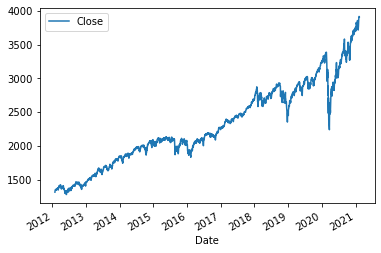

In [18]:
# Plot the date and closing price 
cleaned_stocks.plot(x='Date', y = 'Close')

From this visualization we can clearly see the growth of the S&P 500 over the past few years.

### r/wallstreetbets Subreddit Post History


This graph shows the relationship of score through when r/wallstreetbets was created to the present (January 12, 2012 to February 12, 2021). For this dataset, we don't have any distributions as the graph only shows the score of a post and the time the post was created. There are no outliers due to this. 

Score represents the number of upvotes minus the downvotes. We perceive this as an accurate representation of how active and popular posts are. By graphing the score, we can see the subreddit's popularity throughout time. 

Our data is consistent as we have webscraped this data ourselves. We automated the process so we did not manipulate the data ourselves.

The graph shows low popularity of the subreddit r/wallstreetbets from 2012-2016 and peaked in late 2016. This subreddit's popularity generally increased until late 2018. From late 2018 to early 2019, there is very little popularity. We associate this with the subreddit being banned at some point. However, it returns to around the same popularity after the ban is over. The trend starts decreasing in general, with a few spikes. There are spaces from 2020-2021 where there is very little popularity, which may be associated with them being banned again. In 2021, the popularity of this subreddit skyrocketed. This is due to the GME stock.

<AxesSubplot:xlabel='Date'>

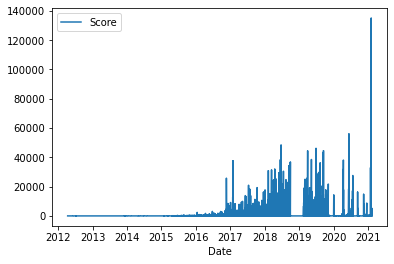

In [46]:
filtered.plot(x='Date', y='Score')